In [1]:
# Topic Modelling

### Loading Data

In [2]:
import pandas as pd
import nltk

In [3]:
# dataset : news_setopati_preprocessed_1.csv is from मंसिर २९, २०८० to जेठ २०, २०७५ from setopati website in politics section.

In [190]:
df = pd.read_csv("../data/news-setopati/news_setopati_preprocessed_1.csv")
df

,topic,date,title,body,link,source
0,politics,"शुक्रबार, मंसिर २९, २०८०",सर्वोच्चमा प्रस्तावित न्यायाधीश अब्दुल अजिज मु...,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...,https://www.setopati.com/politics/318075,Setopati
1,politics,"शुक्रबार, मंसिर २९, २०८०",सर्वोच्चमा प्रस्तावित न्यायाधीश अब्दुल अजिज मु...,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...,https://www.setopati.com/politics/318075,Setopati
2,politics,"शुक्रबार, मंसिर २९, २०८०","'अदालतले आदेश उल्ट्यायो, आत्मालोचना गर्नुहुन्न?'",सर्वोच्च अदालतका लागि प्रस्तावित न्यायाधीश सार...,https://www.setopati.com/politics/318066,Setopati
3,politics,"शुक्रबार, मंसिर २९, २०८०",संसदीय सुनुवाइ समितिमा सांसदहरूले नै राख्दैनन्...,सर्वोच्च अदालतका प्रधानन्यायाधीश न्यायाधीश संव...,https://www.setopati.com/politics/318072,Setopati
4,politics,"शुक्रबार, मंसिर २९, २०८०",'समुदायमा कांग्रेस' अभियान पुस १६ गतेदेखि सुरू...,नेपाली कांग्रेसले पुस गतेदेखि माघ गतेसम्म समुद...,https://www.setopati.com/politics/318070,Setopati
...,...,...,...,...,...,...
38942,politics,"आइतबार, जेठ २०, २०७५",विपी राजमार्गमा मनोमानीः रूट परमिट दिने निर्णय...,काठमाडौंदेखि वर्दिबाससम्मको विपि राजमार्गमा ठू...,https://www.setopati.com/politics/161202,Setopati
38943,politics,"आइतबार, जेठ २०, २०७५",सांसदले अर्थमन्त्रीलाई सोधे : जिडिपी वृद्धि भन...,नेपाली कांग्रेसकी सांसद चित्रलेखा यादवले संसद ...,https://www.setopati.com/politics/161201,Setopati
38944,politics,"आइतबार, जेठ २०, २०७५",छिरिङ वाङ्गेल पुर्पक्षका लागि जेल चलान,साढे किलो सुन र सनम शाक्यको हत्याका मुख्य अभिय...,https://www.setopati.com/politics/161195,Setopati
38945,politics,"आइतबार, जेठ २०, २०७५",अर्थमन्त्रीले प्रत्यक्ष चुनाव लडेमात्र सांसदको...,नेपाली कांग्रेसका सांसद प्रदीप गिरिले अर्थमन्त...,https://www.setopati.com/politics/161191,Setopati


In [5]:
unprocessed_data = pd.DataFrame(columns=['body'])
unprocessed_data["body"] = df["body"].apply(str)
unprocessed_data

,body
0,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...
1,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...
2,सर्वोच्च अदालतका लागि प्रस्तावित न्यायाधीश सार...
3,सर्वोच्च अदालतका प्रधानन्यायाधीश न्यायाधीश संव...
4,नेपाली कांग्रेसले पुस गतेदेखि माघ गतेसम्म समुद...
...,...
38942,काठमाडौंदेखि वर्दिबाससम्मको विपि राजमार्गमा ठू...
38943,नेपाली कांग्रेसकी सांसद चित्रलेखा यादवले संसद ...
38944,साढे किलो सुन र सनम शाक्यको हत्याका मुख्य अभिय...
38945,नेपाली कांग्रेसका सांसद प्रदीप गिरिले अर्थमन्त...


### Preprocessing

In [6]:
nepali_stopwords = open("../resources/stopwords.txt", "r")
stopwords = nepali_stopwords.read().split()
# print(stopwords)
print(len(stopwords))

501


In [7]:
'''
Remove unwanted characters
Remove stop words 
'''
import re
def string_manipulation(unprocessed_data)  : 
    unprocessed_data['body'] = unprocessed_data['body'].apply(lambda x: re.sub('[।(),०-९<<?!,—,–,/,’,‘,:,\u200d]', '', x))
    unprocessed_data['body'] = unprocessed_data['body'].apply(lambda x: " ".join([i.replace('\n', '').replace('\t', '').replace("\"",'') for i in x.split() if i not in (stopwords) and i != ' ']))
    return unprocessed_data

processed_data = string_manipulation(unprocessed_data)
processed_data

# processed_data = pd.DataFrame(columns=['body'])
# processed_data["body"] = df["body"]
# processed_data

,body
0,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...
1,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...
2,सर्वोच्च अदालतका प्रस्तावित न्यायाधीश सारंगा स...
3,सर्वोच्च अदालतका प्रधानन्यायाधीश न्यायाधीश संव...
4,नेपाली कांग्रेसले पुस गतेदेखि माघ गतेसम्म समुद...
...,...
38942,काठमाडौंदेखि वर्दिबाससम्मको विपि राजमार्गमा ठू...
38943,नेपाली कांग्रेसकी सांसद चित्रलेखा यादवले संसद ...
38944,साढे किलो सुन सनम शाक्यको हत्याका अभियुक्त भनि...
38945,नेपाली कांग्रेसका सांसद प्रदीप गिरिले अर्थमन्त...


In [8]:
from nepalitokenizer import NepaliTokenizer

In [9]:
# tokenize.tokenizer('सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर')

In [10]:
'''
tokenizing the corpus 
'''
tokenize = NepaliTokenizer()
processed_data["body"] = processed_data["body"].apply(tokenize.tokenizer)
processed_data

,body
0,"[सर्वोच्च, अदालतमा, प्रस्तावित, न्यायाधीश, अब्..."
1,"[सर्वोच्च, अदालतमा, प्रस्तावित, न्यायाधीश, अब्..."
2,"[सर्वोच्च, अदालतका, प्रस्तावित, न्यायाधीश, सार..."
3,"[सर्वोच्च, अदालतका, प्रधानन्यायाधीश, न्यायाधीश..."
4,"[नेपाली, कांग्रेसले, पुस, गतेदेखि, माघ, गतेसम्..."
...,...
38942,"[काठमाडौंदेखि, वर्दिबाससम्मको, विपि, राजमार्गम..."
38943,"[नेपाली, कांग्रेसकी, सांसद, चित्रलेखा, यादवले,..."
38944,"[साढे, किलो, सुन, सनम, शाक्यको, हत्याका, अभियु..."
38945,"[नेपाली, कांग्रेसका, सांसद, प्रदीप, गिरिले, अर..."


In [11]:
import snowballstemmer

In [12]:
'''
Stemming & StopWord removal after Stemming
'''
stemmer = snowballstemmer.NepaliStemmer()

def get_stem(words):
    global stemmer
    new_list = stemmer.stemWords(words)
    return new_list

def clean_data(words):
    new_list = []
    for word in words:
        if len(word)>2 and word not in stopwords:
            new_list.append(word)

    return new_list
        
# ans = get_stem(["फिल्मी", "अनुराग", "वर्ष", "अघिसम्म", "उनका", "बलिउड"])
# ans

In [13]:
processed_data['body'] = processed_data['body'].apply(lambda x : get_stem(x))

In [14]:
processed_data['body'] = processed_data['body'].apply(lambda x : clean_data(x))

In [15]:
processed_data_list = processed_data['body']

In [16]:
processed_data_list

0        [सर्वोच्च, अदालत, प्रस्तावित, न्यायाधीश, अब्दु...
1        [सर्वोच्च, अदालत, प्रस्तावित, न्यायाधीश, अब्दु...
2        [सर्वोच्च, अदालत, प्रस्तावित, न्यायाधीश, सारंग...
3        [सर्वोच्च, अदालत, प्रधानन्यायाधीश, न्यायाधीश, ...
4        [नेपाली, कांग्रेस, पुस, गते, माघ, गतेसम्म, समु...
                               ...                        
38942    [काठमाडौं, वर्दिबाससम्म, विपि, राजमार्ग, ठूला,...
38943    [नेपाली, कांग्रेस, सांसद, चित्रलेखा, यादव, संस...
38944    [साढे, किलो, सुन, सनम, शाक्य, हत्या, अभियुक्त,...
38945    [नेपाली, कांग्रेस, सांसद, प्रदीप, गिरि, अर्थमन...
38946    [बहुपक्षीय, प्राविधिक, आर्थिक, सहयोग, बंगाल, ख...
Name: body, Length: 38947, dtype: object

### Visualization and Analysis of Data

In [17]:
'''
Finding the frequency Distribution of Words
'''
# words_list = []
# for sentence in processed_data_list:
#     words_list.extend(sentence)
# freq_dist = nltk.FreqDist(words_list)
# freq_dist.most_common(20)

'\nFinding the frequency Distribution of Words\n'

In [18]:
'''
Visualization of Most Frequency 
'''
# %config InlineBackend.figure_format = 'retina'
# import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
# import seaborn as sns
# sns.set()
# nepali_font = FontProperties(fname = 'Mangal.ttf')
# temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.barplot(x='word', y='count', 
#             data=temp, ax=ax)
# plt.title("Top words")
# plt.xticks(rotation='vertical',fontproperties=nepali_font);

'\nVisualization of Most Frequency \n'

In [19]:
'''
Forming Word Cloud
'''
# %config InlineBackend.figure_format = 'retina'

# from wordcloud import WordCloud
# import wordcloud
# # creation of wordcloud
# wcloud_fig = WordCloud(colormap='viridis', width=300, height=200, font_path="./Mangal.ttf").generate_from_frequencies(freq_dist)

# # plotting the wordcloud
# plt.figure(figsize=(10,7), frameon=True )

# plt.imshow(wcloud_fig, interpolation  = 'bilinear')
# plt.show()

'\nForming Word Cloud\n'

### Preparation for LDA

In [20]:
from gensim import corpora

In [21]:
from gensim.test.utils import datapath

In [22]:
'''
Representing the Corpus in dictionary: 
{unique_id : word}
'''
id2word = corpora.Dictionary(processed_data_list)
print(id2word)

Dictionary<220816 unique tokens: ['अजिज', 'अदालत', 'अध्यक्षता', 'अनुमोदन', 'अन्तरिम']...>


In [23]:
'''
Checking dictionary created
'''
# count = 0
# for k, v in id2word.iteritems():
#     print(k, v)
#     count += 1
#     if count > 10:
#         break

'\nChecking dictionary created\n'

In [24]:
'''
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
# id2word.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)
id2word.filter_extremes(no_below=15, no_above=0.1, keep_n=None)

In [25]:
print(id2word)

Dictionary<18580 unique tokens: ['अजिज', 'अध्यक्षता', 'अनुमोदन', 'अन्तरिम', 'अब्दुल']...>


In [26]:
# save dictionary
# id2word.save('../saved_model/dictionary_2')

In [27]:
'''
bag-of-words format = list of (token_id, token_count) 2-tuples
'''
#  now lets create a encoded bag of words 
bow_corpus = [id2word.doc2bow(sent) for sent in processed_data_list]
# bow_corpus[0] 

In [28]:
# # save bow corpus
# with open('../saved_model/bow_corpus_2.txt', 'w') as f:
#     for line in bow_corpus:
#         f.write(f"{line}\n")

In [29]:
'''
Preview BOW for our sample preprocessed document
'''
# Here document_num is document number 4310 which we have checked in Step 2
# document_num = 4310
# bow_doc_4310 = bow_corpus[document_num]
# count = 0

# for i in range(len(bow_doc_4310)):
#     print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
#                                                      id2word[bow_doc_4310[i][0]], 
#                                                      bow_doc_4310[i][1]))
#     count += 1
#     if count > 10:
#         break

'\nPreview BOW for our sample preprocessed document\n'

### LDA - (BOW)

In [35]:
# Creating the object for LDA model using gensim library
import gensim
from gensim.models import CoherenceModel

In [36]:
'''
Loading the Saved Model
'''
# loading model from disk
from gensim import  models

# temp_file = datapath("lda_model_politics_31")
lda_model = models.ldamodel.LdaModel.load('../saved_model/lda_model_politics_2')

In [37]:
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# LDA = gensim.models.ldamulticore.LdaMulticore
# # [deprecated] lda_model = LDA(corpus=corpus_matrix,id2word=id2word, num_topics=10, random_state=100,update_every=1,chunksize=100,passes=5,alpha='auto',per_word_topics=True)

# lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=40, id2word=id2word, passes=50, workers=5)

"\nTrain your lda model using gensim.models.LdaMulticore and save it to 'lda_model'\n"

In [38]:
'''
For Saving  Model
'''
# saving model to disk.
# [ deprecated ] temp_file = datapath("../../../../../../../saved_model/lda_model_politics_3")
# lda_model.save('../saved_model/lda_model_politics_2')

'\nFor Saving  Model\n'

In [39]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic id : {}".format(idx))
    print("Words: {} \n".format(topic))
    print("\n")

Topic id : 0
Words: 0.090*"विधेयक" + 0.041*"संशोधन" + 0.033*"कानुन" + 0.026*"पारित" + 0.023*"अध्यादेश" + 0.020*"अधिकार" + 0.017*"फिर्ता" + 0.013*"ल्या" + 0.012*"प्रावधान" + 0.011*"पेश" 



Topic id : 1
Words: 0.053*"मेयर" + 0.041*"महानगर" + 0.021*"वडा" + 0.020*"नगरपालिका" + 0.019*"जग्गा" + 0.018*"फोहोर" + 0.017*"महानगरपालिका" + 0.017*"नगर" + 0.010*"व्यवस्थापन" + 0.010*"बालेन" 



Topic id : 2
Words: 0.037*"विप्लव" + 0.022*"निधन" + 0.020*"समूह" + 0.019*"पक्राउ" + 0.015*"चन्द" + 0.014*"साल" + 0.013*"कार्यकर्ता" + 0.011*"वार्ता" + 0.010*"गोली" + 0.010*"मोर्चा" 



Topic id : 3
Words: 0.047*"जग्गा" + 0.018*"ढकाल" + 0.015*"सचिव" + 0.015*"पाण्डे" + 0.014*"सुवे" + 0.013*"साह" + 0.013*"चौधरी" + 0.011*"निवास" + 0.011*"यादव" + 0.008*"घिमिरे" 



Topic id : 4
Words: 0.027*"सेना" + 0.021*"भारतीय" + 0.018*"सैनिक" + 0.015*"भारत" + 0.015*"आक्रमण" + 0.011*"युक्रेन" + 0.009*"रूस" + 0.007*"रूसी" + 0.007*"भाजपा" + 0.007*"युद्ध" 



Topic id : 5
Words: 0.041*"सडक" + 0.026*"आयोजना" + 0.024*"भवन" + 0.021*"र

In [40]:
'''
This groups the documents by their topic, for e.g
{
    0 : [list of documents in topic index 0]
}
'''

cluster_by_topic = {}
[cluster_by_topic.setdefault(i, []) for i in range(lda_model.num_topics)]
index = 0
for bow in bow_corpus:
    topics_list = lda_model.get_document_topics(bow,minimum_probability=0.8)
    for topic_id, score in topics_list: 
        cluster_by_topic[topic_id].append(index)
    index += 1

In [41]:
print(lda_model.num_topics)

40


In [42]:
'''
# Printing the documents that belong to a certain topic 
# '''
for k,v in cluster_by_topic.items():
    print ("Topic : {}".format(lda_model.print_topic(k)))
    print ("---------------------------------------------------")
    for index in v:
        print (df['title'][index])
    print ("---------------------------------------------------")


Topic : 0.090*"विधेयक" + 0.041*"संशोधन" + 0.033*"कानुन" + 0.026*"पारित" + 0.023*"अध्यादेश" + 0.020*"अधिकार" + 0.017*"फिर्ता" + 0.013*"ल्या" + 0.012*"प्रावधान" + 0.011*"पेश"
---------------------------------------------------
राष्ट्रपतिले प्रमाणीकरण गरे केही नेपाल ऐनलाई संशोधन गर्न बनेको विधेयक
राष्ट्रियसभाले पारित गर्‍यो मिटर ब्याजसम्बन्धी विधेयक
प्रतिनिधि सभाबाट पारित भयो मिटर-ब्याजसम्बन्धी विधेयक
मिटरब्याज पीडितलाई न्याय दिन ल्याइएको विधेयक प्रतिनिधि सभाबाट आजै पारित गर्ने तयारी
विद्युत व्यापारसम्बन्धी विधेयक संसदमा पेश गर्ने मन्त्रिपरिषदको निर्णय
नागरिकता विधेयक प्रमाणीकरणका लागि राष्ट्रपतिलाई आग्रह गर्ने मन्त्रिपरिषद्को निर्णय*
प्रतिनिधि सभा बैठक बस्दै, यस्तो छ सम्भावित कार्यसूची 
राष्ट्रपतिद्वारा तीन विधेयक प्रमाणीकरण
राष्ट्रपतिद्वारा दुई वटा विधेयक प्रमाणीकरण
नागरिकता विधेयक प्रमाणीकरण गर्ने समयसीमा आज सकिँदै
राष्ट्रिय सभाले संशोधन गरेका तीन वटा विधेयक प्रतिनिधि सभामा स्वीकृत
नागरिकता विधेयक छुटाएर राष्ट्रपतिले प्रमाणीकरण गरिन् पाँच विधेयक
राष्ट्रपतिले प्रमाणीकरण गरिन् ५ विधेयक
र

In [39]:
'''
Getting the top 5 documents in each topics
'''
my_ids = [i for i in range(len(bow_corpus))]

top_documents = {}
[top_documents.setdefault(i, []) for i in range(lda_model.num_topics)]

for topic_id in range(lda_model.num_topics):
    tops = sorted(zip(my_ids, lda_model[bow_corpus]), reverse=True, key=lambda x: abs(dict(x[1]).get(topic_id, 0.0)))
    top_five =  tops[ : 5]
    for index, _ in top_five:
        top_documents[topic_id].append(index)

KeyboardInterrupt: 

In [ ]:
'''
Printing the top 5 documents in each topics
'''
for k,v in top_documents.items():
    print ("Topic : {}".format(lda_model.print_topic(k)))
    print ("---------------------------------------------------")
    for index in v:
        print (df['title'][index])
    print ("---------------------------------------------------")

In [40]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

KeyboardInterrupt: 

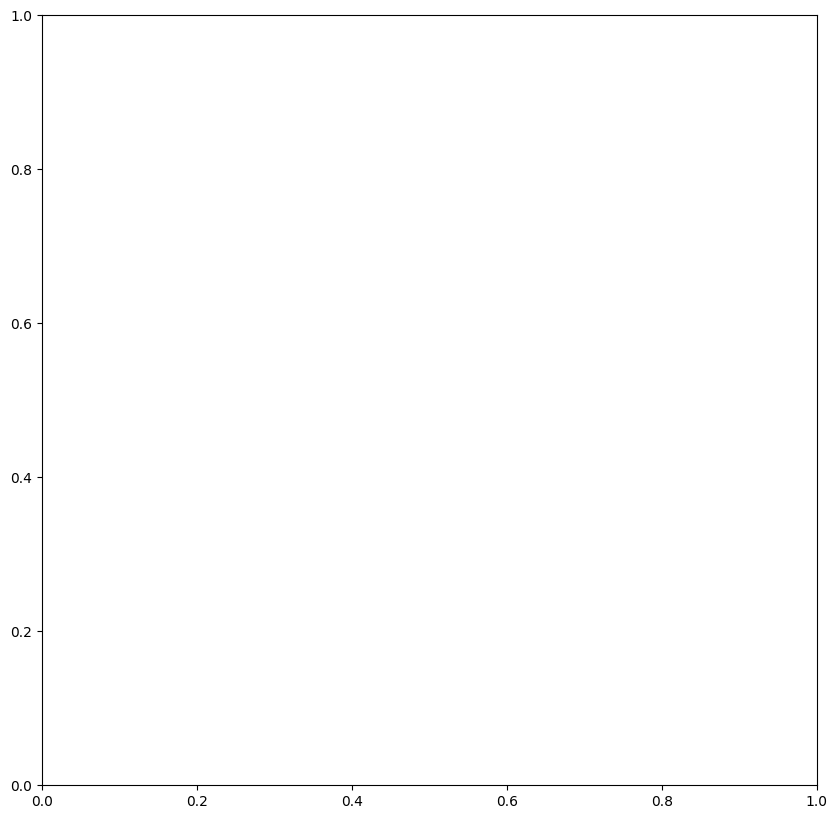

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus = bow_corpus, dictionary = id2word)
vis

### LDA - (TF-IDF)

In [42]:
'''
Create tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'
'''
# from gensim import corpora, models

# tfidf = models.TfidfModel(bow_corpus)

"\nCreate tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'\n"

In [43]:
'''
Apply transformation to the entire corpus and call it 'corpus_tfidf'
'''
# corpus_tfidf = tfidf[bow_corpus]

"\nApply transformation to the entire corpus and call it 'corpus_tfidf'\n"

In [44]:
'''
Preview TF-IDF scores for our first document --> --> (token_id, tfidf score)
'''
# count = 0
# from pprint import pprint
# for doc in corpus_tfidf:
#     pprint(doc)
#     count +=1
#     if count > 10 :
#         break

'\nPreview TF-IDF scores for our first document --> --> (token_id, tfidf score)\n'

In [45]:
# import operator

In [46]:
'''
This took more than 20 minutes so i had to stop
It attempts to keep training lda model until the thresold is reached
'''
def ret_top_model():
    """
    Since LDAmodel is a probabilistic model, it comes up different topics each time we run it. To control the
    quality of the topic model we produce, we can see what the interpretability of the best topic is and keep
    evaluating the topic model until this threshold is crossed. 
    
    Returns:
    -------
    lm: Final evaluated topic model
    top_topics: ranked topics in decreasing order. List of tuples
    """
    # top_topics = [(0, 0)]
    # while top_topics[0][1] < 0.97:

    #     lm = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=id2word, passes=2, workers=2)
    #     coherence_values = {}
    #     for n, topic in lm.show_topics(num_topics=-1, formatted=False):
    #         topic = [word for word, _ in topic]
    #         cm = CoherenceModel(topics=[topic], texts=processed_data_list, dictionary=id2word, window_size=10)
    #         coherence_values[n] = cm.get_coherence()
    #     top_topics = sorted(coherence_values.items(), key=operator.itemgetter(1), reverse=True)
    #     print(top_topics[0][1])
    # return lm, top_topics

In [47]:
# lm, top_topics = ret_top_model()

### HDP

In [48]:
# from gensim.models import HdpModel

In [49]:
# hdp_model = gensim.models.HdpModel(bow_corpus, id2word=id2word)

In [50]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
# for idx, topic in hdp_model.print_topics(-1):
#     print("Topic: {} \nWords: {}".format(topic, idx ))
#     print("\n")

'\nFor each topic, we will explore the words occuring in that topic and its relative weight\n'

In [51]:
# document_dict = {
#     0 : "Manoranjan",
#     1000 : "Sahitya",
#     2000 : "Suchana Prabhidhi",
#     3000 : "Bichar",
#     4350 : "Swasthya",
#     5000 : "Prabas",
#     6000 : "Khelkud",
#     7000 : "Viswa",
#     8000 : "Desh",
#     9000 : "Artha",
# }
# document_num = 9200 
# print()
# # Our test document is document number 4310
# for k,v in document_dict.items():
#     print("\n{}\n".format(v))
#     for index, score in sorted(hdp_model[bow_corpus[k]], key=lambda tup: -1*tup[1]):
#         print("\nScore: {}\t \nTopic: {}".format(score, hdp_model.print_topic(index, 5)))

In [52]:
# '''
# Define lda model using corpus_tfidf, again using gensim.models.LdaMulticore()
# '''

# lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
#                                        num_topics=25, 
#                                        id2word = id2word, 
#                                        passes = 2, 
#                                        workers=2)

In [53]:
# '''
# For each topic, we will explore the words occuring in that topic and its relative weight
# '''
# for idx, topic in lda_model_tfidf.print_topics(-1):
#     print("Topic: {} Word: {}".format(idx, topic))
#     print("\n")

In [54]:
# '''
# Check which topic our test document belongs to using the LDA TF-IDF model.
# '''
# # Our test document is document number 4310
# for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

In [55]:
# lda_model.print_topics()

### Unseen Document Topic Identification 

In [52]:
df1 = pd.DataFrame(columns=['body'])
df1

,body


In [53]:
'''
Unseen Document
'''

# Rajniti
df1.loc[0] = ['''
सन् २०२० को डिसेम्बर २९ मा हमासका सबै समूहका नेता इस्माइल हानियाले गाजाका विभिन्न सशस्त्र गुटहरूबीच "बलियो सन्देश र एकताको सङ्केत" को रूपमा 'स्ट्रङ पिलर' छद्म नाम दिइएको चारमध्ये पहिलो सैन्य अभ्यास गर्ने घोषणा गरे।

हमास गाजाको सबैभन्दा शक्तिशाली सशस्त्र समूह थियो। अन्य १० प्यालेस्टिनी समूह पनि सम्मिलित गठबन्धन हमास प्रमुख घटक थियो। ती लडाकु समूहहरू युद्धको खेलजस्तो अभ्यासमा सहभागी भए। त्यसलाई "संयुक्त अपरेशन कक्ष"ले निगरानी गरेको थियो।

गाजाका सशस्त्र गुटहरूसँग एउटा केन्द्रीय कमान्डअन्तर्गत समन्वय गर्न सन् २०१८ मा उक्त संरचना बनाइएको थियो।

सन् २०१८ अघि हमासले प्यालेस्टिनी इस्लामिक जिहाद (पीआईजे) सँग समन्वय गरेको थियो। पीआईजे गाजाको दोस्रो ठूलो सशस्त्र गुट हो। ब्रिटेन र अन्य देशमा उक्त सङ्गठनलाई हमासलाई जसरी नै प्रतिबन्धित आतङ्कवादी सङ्गठनका रूपमा हेरिन्छ। 

पहिलाका द्वन्द्वमा पनि हमासले अरू समूहहरूसँग मिलेर लडाइँ गरेको थियो।

तर २०२० को अभ्यासलाई धेरै समूह एकजुट भएको प्रमाणको रूपमा प्रचारबाजी गरियो।

हमास नेताले पहिलो अभ्यासले सशस्त्र समूहहरूको "स्थायी तत्परता" प्रतिबिम्बित गरेको बताएका थिए।

तीन वर्षमा गरिएका चारवटा संयुक्त अभ्यासमध्ये सन् २०२० को अभ्यास पहिलो थियो। विभिन्न सामाजिक सञ्जालहरूमा ती सबैसँग सम्बन्धित भिडिओहरू छन्।

सन्देश आदानप्रदान गर्ने एप टेलिग्राममा प्रेषित फुटेजका अनुसार ‘स्ट्रङ पिलर’ अभ्यासमा सहभागी भएका पीआईजेसहित १० वटा लडाकु समूहलाई टाउकोमा बाँध्ने पट्टी र चिह्नका आधारमा बीबीसीले स्पष्टसँग पहिचान गरेको छ।  
''' ]

df1

,body
0,\nसन् २०२० को डिसेम्बर २९ मा हमासका सबै समूहका...


In [54]:
'''
Preparing the Bag of Words
'''
df1['body'] = df1['body'].apply(str)
processed_new_data = string_manipulation(df1)
df1

,body
0,डिसेम्बर हमासका समूहका नेता इस्माइल हानियाले ग...


In [55]:
processed_new_data['body'].to_list()[0]

"डिसेम्बर हमासका समूहका नेता इस्माइल हानियाले गाजाका सशस्त्र गुटहरूबीच बलियो सन्देश एकताको सङ्केत रूपमा 'स्ट्रङ पिलर' छद्म नाम दिइएको चारमध्ये सैन्य अभ्यास घोषणा हमास गाजाको सबैभन्दा शक्तिशाली सशस्त्र समूह प्यालेस्टिनी समूह सम्मिलित गठबन्धन हमास प्रमुख घटक लडाकु समूहहरू युद्धको खेलजस्तो अभ्यासमा सहभागी त्यसलाई संयुक्त अपरेशन कक्षले निगरानी गाजाका सशस्त्र गुटहरूसँग केन्द्रीय कमान्डअन्तर्गत समन्वय संरचना बनाइएको हमासले प्यालेस्टिनी इस्लामिक जिहाद पीआईजे समन्वय पीआईजे गाजाको सशस्त्र गुट ब्रिटेन देशमा सङ्गठनलाई हमासलाई प्रतिबन्धित आतङ्कवादी सङ्गठनका रूपमा हेरिन्छ पहिलाका द्वन्द्वमा हमासले समूहहरूसँग मिलेर लडाइँ अभ्यासलाई समूह एकजुट प्रमाणको रूपमा प्रचारबाजी गरियो हमास नेताले अभ्यासले सशस्त्र समूहहरूको स्थायी तत्परता प्रतिबिम्बित बताएका वर्षमा गरिएका चारवटा संयुक्त अभ्यासमध्ये अभ्यास सामाजिक सञ्जालहरूमा सबैसँग सम्बन्धित भिडिओहरू सन्देश आदानप्रदान एप टेलिग्राममा प्रेषित फुटेजका स्ट्रङ पिलर अभ्यासमा सहभागी पीआईजेसहित लडाकु समूहलाई टाउकोमा बाँध्ने पट्टी चिह्नका आधारमा बीबीसीले स्पष्टसँग पहिचान

In [56]:
processed_new_data["body"] = processed_new_data["body"].apply(tokenize.tokenizer)

In [57]:
processed_new_data

,body
0,"[डिसेम्बर, हमासका, समूहका, नेता, इस्माइल, हानि..."


In [58]:
processed_new_data['body'] = processed_new_data['body'].apply(lambda x : get_stem(x))
# processed_new_data.news.to_list()

In [59]:
processed_new_data['body'] = processed_new_data['body'].apply(lambda x : clean_data(x))
for l in processed_new_data.body.to_list():
    print(len(l))

117


[['डिसेम्बर',
  'हमास',
  'समूह',
  'नेता',
  'इस्माइल',
  'हानिया',
  'गाजा',
  'सशस्त्र',
  'गुटहरूबीच',
  'सन्देश',
  'एकता',
  'सङ्केत',
  'स्ट्रङ',
  'पिलर',
  'छद्म',
  'नाम',
  'चारमध्ये',
  'सैन्य',
  'अभ्यास',
  'घोषणा',
  'हमास',
  'गाजा',
  'सबैभन्',
  'शक्तिशाली',
  'सशस्त्र',
  'समूह',
  'प्यालेस्टिनी',
  'समूह',
  'सम्मिलित',
  'गठबन्धन',
  'हमास',
  'प्रमुख',
  'घटक',
  'लडाकु',
  'समूह',
  'युद्ध',
  'खेलजस्तो',
  'अभ्यास',
  'सहभागी',
  'संयुक्त',
  'अपरेशन',
  'कक्ष',
  'निगरानी',
  'गाजा',
  'सशस्त्र',
  'गुट',
  'केन्द्रीय',
  'कमान्डअन्तर्गत',
  'समन्वय',
  'संरचना',
  'बना',
  'हमास',
  'प्यालेस्टिनी',
  'इस्लामिक',
  'जिहाद',
  'पीआईजे',
  'समन्वय',
  'पीआईजे',
  'गाजा',
  'सशस्त्र',
  'गुट',
  'ब्रिटेन',
  'देश',
  'सङ्गठन',
  'हमास',
  'प्रतिबन्धित',
  'आतङ्कवा',
  'सङ्गठन',
  'हेर',
  'पहिला',
  'द्वन्द्व',
  'हमास',
  'समूह',
  'मिलेर',
  'लडाइँ',
  'अभ्यास',
  'समूह',
  'एकजुट',
  'प्रमाण',
  'प्रचारबाजी',
  'हमास',
  'नेता',
  'अभ्यास',
  'सशस्त्र',
  'समूह

In [173]:
list_of_string

['डिसेम्बर',
 'हमास',
 'समूह',
 'नेता',
 'इस्माइल',
 'हानिया',
 'गाजा',
 'सशस्त्र',
 'गुटहरूबीच',
 'सन्देश',
 'एकता',
 'सङ्केत',
 'स्ट्रङ',
 'पिलर',
 'छद्म',
 'नाम',
 'चारमध्ये',
 'सैन्य',
 'अभ्यास',
 'घोषणा',
 'हमास',
 'गाजा',
 'सबैभन्',
 'शक्तिशाली',
 'सशस्त्र',
 'समूह',
 'प्यालेस्टिनी',
 'समूह',
 'सम्मिलित',
 'गठबन्धन',
 'हमास',
 'प्रमुख',
 'घटक',
 'लडाकु',
 'समूह',
 'युद्ध',
 'खेलजस्तो',
 'अभ्यास',
 'सहभागी',
 'संयुक्त',
 'अपरेशन',
 'कक्ष',
 'निगरानी',
 'गाजा',
 'सशस्त्र',
 'गुट',
 'केन्द्रीय',
 'कमान्डअन्तर्गत',
 'समन्वय',
 'संरचना',
 'बना',
 'हमास',
 'प्यालेस्टिनी',
 'इस्लामिक',
 'जिहाद',
 'पीआईजे',
 'समन्वय',
 'पीआईजे',
 'गाजा',
 'सशस्त्र',
 'गुट',
 'ब्रिटेन',
 'देश',
 'सङ्गठन',
 'हमास',
 'प्रतिबन्धित',
 'आतङ्कवा',
 'सङ्गठन',
 'हेर',
 'पहिला',
 'द्वन्द्व',
 'हमास',
 'समूह',
 'मिलेर',
 'लडाइँ',
 'अभ्यास',
 'समूह',
 'एकजुट',
 'प्रमाण',
 'प्रचारबाजी',
 'हमास',
 'नेता',
 'अभ्यास',
 'सशस्त्र',
 'समूह',
 'स्थायी',
 'तत्परता',
 'प्रतिबिम्बित',
 'बता',
 'वर्ष',
 'चारवटा',
 'संयुक्त',
 '

In [60]:
'''
Finds the topic and corresponding score for the unseen document 
'''
# Data preprocessing step for the unseen document
list_of_string = processed_new_data.body.to_list()[0] 
bow_vector = id2word.doc2bow(list_of_string)
print(bow_vector)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

[(71, 1), (250, 1), (260, 1), (310, 2), (349, 1), (493, 1), (558, 1), (574, 8), (599, 1), (711, 2), (870, 2), (1029, 6), (1256, 1), (1583, 1), (1734, 5), (1811, 1), (1818, 1), (1820, 1), (2192, 1), (2301, 1), (2335, 1), (2352, 2), (2422, 1), (2515, 4), (2536, 1), (2540, 1), (2544, 7), (2576, 1), (2643, 1), (3700, 1), (3763, 1), (4306, 1), (4903, 2), (4923, 1), (5126, 1), (5311, 1), (5617, 1), (5785, 1), (5816, 1), (6576, 1), (6835, 1), (7794, 1), (8370, 1), (9110, 1), (9549, 1), (9614, 2), (9882, 1), (11315, 1), (12319, 2), (12994, 1), (13950, 1), (14505, 1), (14612, 1), (15923, 1), (16817, 1)]
Score: 0.42680829763412476	 Topic: 0.027*"सेना" + 0.021*"भारतीय" + 0.018*"सैनिक" + 0.015*"भारत" + 0.015*"आक्रमण"
Score: 0.18097537755966187	 Topic: 0.013*"मुलुक" + 0.008*"व्यक्त" + 0.007*"समृद्धि" + 0.007*"विश्वास" + 0.007*"अवसर"
Score: 0.10159416496753693	 Topic: 0.021*"सामाजिक" + 0.020*"सञ्जाल" + 0.015*"समाचार" + 0.013*"घटना" + 0.013*"लेख"
Score: 0.08974627405405045	 Topic: 0.054*"कमिटी" + 0.0

In [65]:
# test code
topic_distribution = lda_model[bow_vector]
topic_distribution

[(1, 0.042241115),
 (4, 0.42681462),
 (9, 0.01820012),
 (11, 0.027937977),
 (15, 0.08975611),
 (28, 0.10161519),
 (36, 0.08683139),
 (38, 0.01673003),
 (39, 0.18095009)]

In [79]:
# test code
topics_sorted = sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1])

In [81]:
# test code
topics_sorted = [(i,j) for i,j in topics_sorted if j>0.42]

In [80]:
# test code
topics_sorted

[(4, 0.4268147),
 (39, 0.18095036),
 (28, 0.1016075),
 (15, 0.0897576),
 (36, 0.08683102),
 (1, 0.04223706),
 (11, 0.027929628),
 (9, 0.018213917),
 (38, 0.01673488)]

In [82]:
# test code
topics_sorted

[(4, 0.4268147)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


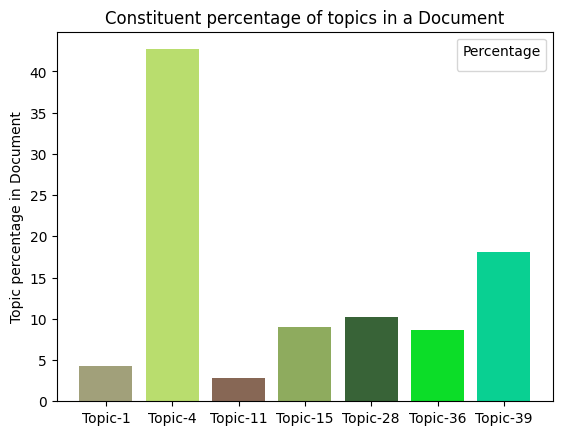

In [73]:
# test code
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

topics =['Topic-'+str(idx) for idx,score in topic_distribution if score > 0.02]
score = [score * 100 for idx,score in topic_distribution if score > 0.02 ]
num_bars = len(topic_distribution)
random_colors = [np.random.rand(3,) for _ in range(num_bars)]

ax.bar(topics, score,color=random_colors)

ax.set_ylabel('Topic percentage in Document')
ax.set_title('Constituent percentage of topics in a Document')
ax.legend(title='Percentage')

plt.savefig('topics.png', bbox_inches='tight')

In [68]:
# test code
x = dict(lda_model.show_topic(0,20))
print(x)

{'विधेयक': 0.089846514, 'संशोधन': 0.041204028, 'कानुन': 0.033222605, 'पारित': 0.026018558, 'अध्यादेश': 0.023459487, 'अधिकार': 0.01959666, 'फिर्ता': 0.016868647, 'ल्या': 0.0134006655, 'प्रावधान': 0.012350609, 'पेश': 0.0113001475, 'संघीय': 0.00838655, 'कानून': 0.00835864, 'प्रमाणीकरण': 0.007674107, 'सम्बन्ध': 0.0068318113, 'नियमावली': 0.0067264754, 'सम्बन्धी': 0.0063066646, 'धारा': 0.0059546237, 'काउन्सिल': 0.005319776, 'प्रस्तुत': 0.005177105, 'भण्डारी': 0.005085131}


In [69]:
# test code
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [46]:
# test code
plt.axis('off')
plt.imshow(WordCloud(font_path="../resources/Mangal.ttf").fit_words(x))
plt.savefig('image.png', bbox_inches='tight')

NameError: name 'plt' is not defined

In [45]:
# test code
lda_model.print_topic(0)

'0.090*"विधेयक" + 0.041*"संशोधन" + 0.033*"कानुन" + 0.026*"पारित" + 0.023*"अध्यादेश" + 0.020*"अधिकार" + 0.017*"फिर्ता" + 0.013*"ल्या" + 0.012*"प्रावधान" + 0.011*"पेश"'

### Document Similarity - JensenShanon Distance

In [128]:
import numpy as np

In [129]:
'''
Obtaining the topic distribution of every document
'''
doc_topic_dist = []
count = 0
for bow in bow_corpus:
    topics_list = lda_model.get_document_topics(bow,minimum_probability=0)
    # print(topics_list)
    # print(len(topics_list))
    # if count > 2:
    #     break
    # count += 1
    row = []
    for idx, score in topics_list:
        row.append(score)

    doc_topic_dist.append(row)

print(len(doc_topic_dist))

38947


In [133]:
doc_distribution = np.array(doc_topic_dist)
doc_distribution[0]

array([9.8533834e-05, 4.3565251e-02, 2.5594948e-02, 7.0101753e-02,
       9.8533834e-05, 6.7763530e-02, 8.9055657e-02, 9.8533834e-05,
       9.8533834e-05, 9.8533834e-05, 9.8533834e-05, 9.8533834e-05,
       8.3402425e-02, 9.8533834e-05, 9.8533834e-05, 9.8533834e-05,
       9.8533834e-05, 9.8533834e-05, 7.4825766e-03, 9.8533834e-05,
       9.8533834e-05, 9.8533834e-05, 9.8533834e-05, 9.8533834e-05,
       9.8533834e-05, 9.8533834e-05, 9.8533834e-05, 9.8533834e-05,
       9.8533834e-05, 9.8533834e-05, 9.8533834e-05, 3.0356333e-01,
       1.1047586e-02, 2.3727366e-01, 5.8291819e-02, 9.8533834e-05,
       9.8533834e-05, 9.8533834e-05, 9.8533834e-05, 9.8533834e-05],
      dtype=float32)

In [167]:
df_temp = pd.DataFrame(doc_distribution)

In [172]:
# save to csv [ check this code if works, as i modified this one ]
# df_temp.to_csv('../saved_model/doc_topic_distribution_39k.csv',index=False,index_label=None)

In [175]:
# read from csv
df_temp = pd.read_csv('../saved_model/doc_topic_distribution_39k.csv')

In [183]:
new_dist = []
for idx,score in lda_model.get_document_topics(bow_vector, minimum_probability=0):
    new_dist.append(score)

new_doc_distribution = np.array(new_dist)
new_doc_distribution.shape
# new_doc_distribution = np.array([tup[1] for tup in lda_model[bow_vector]])
# new_doc_distribution.shape

(40,)

In [184]:
from scipy.stats import entropy
from scipy.spatial import distance

In [185]:
# def jensen_shannon(query, matrix):
#     """
#     This function implements a Jensen-Shannon similarity
#     between the input query (an LDA topic distribution for a document)
#     and the entire corpus of topic distributions.
#     It returns an array of length M where M is the number of documents in the corpus
#     """
#     # lets keep with the p,q notation above
#     p = query[None,:].T # take transpose
#     q = matrix.T # transpose matrix
#     m = 0.5*(p + q)
#     return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))

def jensen_shannon(query, matrix):
    """
    This function implements a Jensen-Shannon similarity
    between the input query (an LDA topic distribution for a document)
    and the entire corpus of topic distributions.
    """
    sim = [distance.jensenshannon(data,query) for data in matrix]
    return np.array(sim)

In [186]:
def get_most_similar_documents(query,matrix,k=10):
    """
    This function implements the Jensen-Shannon distance above
    and retruns the top k indices of the smallest jensen shannon distances
    """
    sims = jensen_shannon(query,matrix) # list of jensen shannon distances
    return sims.argsort()[:k] # the top k positional index of the smallest Jensen Shannon distances

In [191]:
most_sim_ids = get_most_similar_documents(new_doc_distribution, doc_distribution)
print(most_sim_ids)
for ids in most_sim_ids:
    print(df['title'][ids])

[29790 12536  2707 14051  9757 10319 26741 14106  8635 27074]
सिरियाली फौजलाई प्रत्याक्रमण गर्ने टर्कीका राष्ट्रपतिको चेतावनी
भाजपामा जाने भए हार्दिक पटेल, मोदीको गरे प्रशंसा
अफ्रिकी मुलुक नाइजरमा सैन्य कू, राष्ट्रपति नियन्त्रणमा
चुनाव हारेपछि सोनियाले हटाइन् सिद्धुसहित कंग्रेसका पाँच प्रदेश प्रमुख
रूस-युक्रेन युद्धका २ सय दिन, आक्रमण र प्रतिरोध जारी
तेस्रो पटक किभ पुगेर बेलायती प्रधानमन्त्रीले थप सहयोग घोषणा गर्दै भने- युक्रेनले यो युद्ध अवश्य जित्नेछ
सुलेमानीको नाममा इरानले ल्यायो नयाँ ब्यालिस्टिक मिसाइल
पाँच राज्यमा चुनाव हारेपछि बसेको कंग्रेस आईको बैठकले जनायो सोनिया गान्धी नेतृत्वमा विश्वास
जर्मनीको संसद भवनमा आक्रमण गर्ने योजना बनाइरहेका २५ जना पक्राउ
तालिवान लडाकूको आक्रमण विफल, १३ जना गैर–अफगानीसहित ३१ को मृत्यु


In [196]:
df['title'][12,14]

KeyError: 'key of type tuple not found and not a MultiIndex'